### Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

#### 1.1. Скачать данные по ссылке kc_house_data

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [123]:
df = pd.read_csv('kc_house_data.csv')
df.drop(columns=['date', 'zipcode', 'lat', 'long'], inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


#### 1.2 Изучите стоимости недвижимости

In [124]:
df['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

#### 1.3 Изучите распределение квадратуры жилой

In [125]:
df['sqft_living'].describe().round(0)

count    21613.0
mean      2080.0
std        918.0
min        290.0
25%       1427.0
50%       1910.0
75%       2550.0
max      13540.0
Name: sqft_living, dtype: float64

Text(0, 0.5, 'Кол-во объектов')

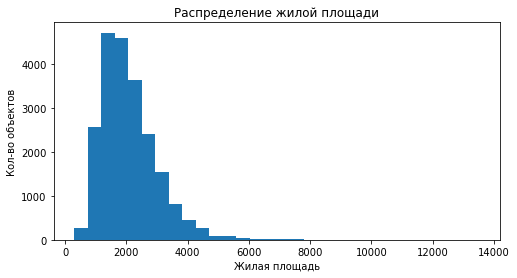

In [126]:
plt.figure(figsize=(8, 4))

plt.hist(df['sqft_living'], bins=30)

plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во объектов')

##### Большинство объектов имеют площадь в районе 1910 (1427 - 2550) минимальное значение 290, максимальное 13 540.

1.4 Изучите распределение года постройки

In [127]:
df['yr_built'].describe().round(0)

count    21613.0
mean      1971.0
std         29.0
min       1900.0
25%       1951.0
50%       1975.0
75%       1997.0
max       2015.0
Name: yr_built, dtype: float64

Text(0, 0.5, 'Кол-во объектов')

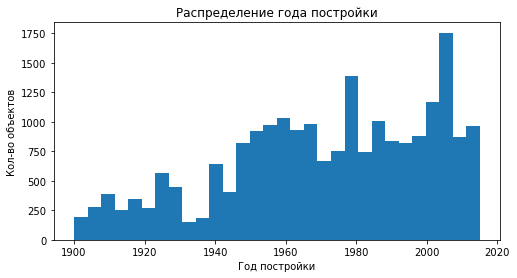

In [128]:
plt.figure(figsize=(8, 4))

plt.hist(df['yr_built'], bins=30)

plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во объектов')

##### Большинство объектов построеные с начала 1975 года, самый новый объект из базы 2015 года постройки, самый ранний 1900 года.

### Условие 2: 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную

In [129]:
df['waterfront'].describe().round(0)

count    21613.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: waterfront, dtype: float64

In [130]:
view = df["waterfront"].value_counts()
view

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Вид на набережную')

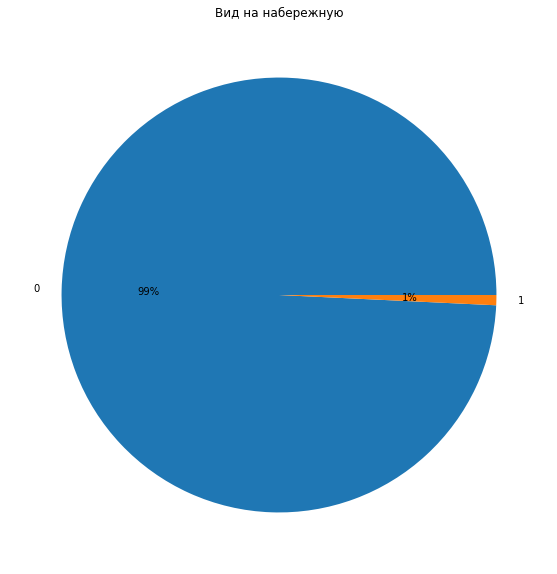

In [131]:
plt.figure(figsize=(10, 10))
plt.pie(view.values,autopct='%1.lf%%', labels = view.index)
plt.title('Вид на набережную')

Text(0, 0.5, 'Кол-во объектов')

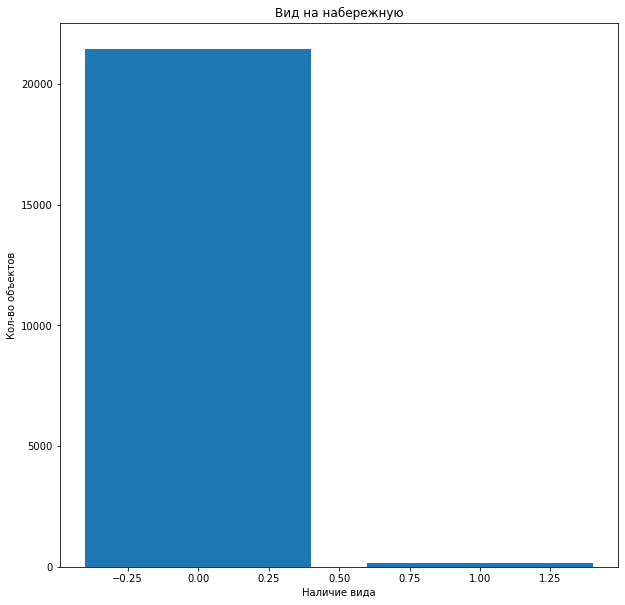

In [132]:
plt.figure(figsize = (10,10))
plt.bar(view.index, view.values)
plt.title("Вид на набережную")
plt.xlabel("Наличие вида")
plt.ylabel("Кол-во объектов")

##### Большинство объектов не имеет вида на набережную 

#### 2.2 Изучите распределение этажей домов

In [133]:
df['floors'].describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [134]:
floors = df["floors"].value_counts()
floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

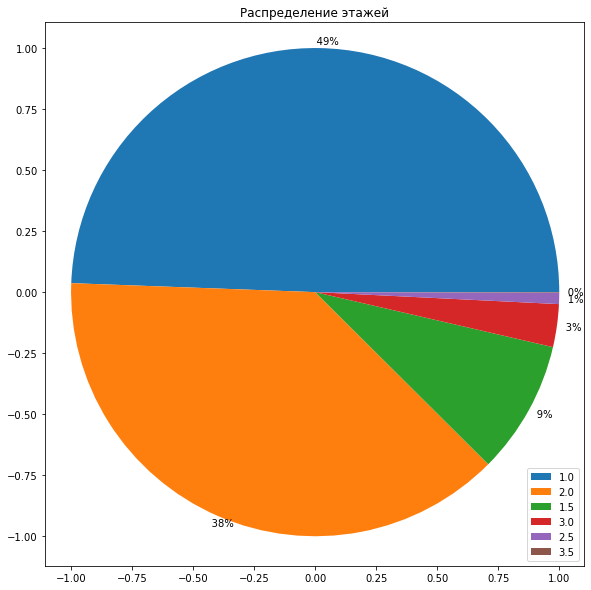

In [135]:
plt.figure(figsize=(10, 10))
plt.pie(floors.values,autopct='%7.lf%%',frame=True,pctdistance = 1.03)
plt.title('Распределение этажей')
plt.legend(floors.index);

Text(0, 0.5, 'Кол-во объектов')

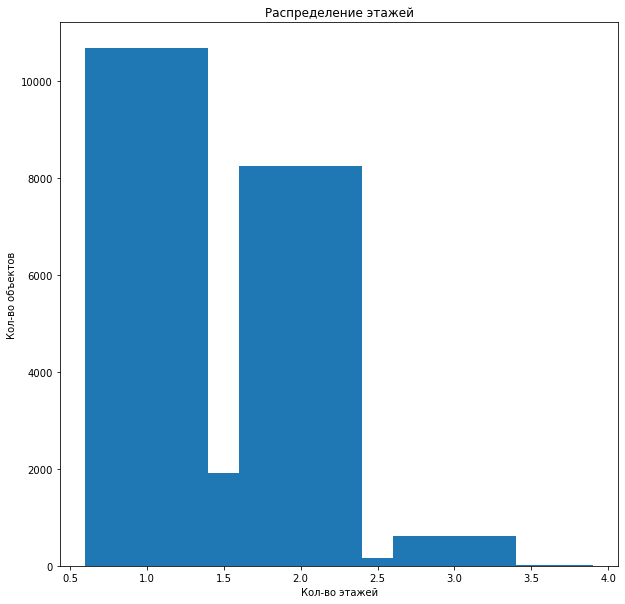

In [136]:
plt.figure(figsize = (10,10))
plt.bar(floors.index, floors.values)
plt.title("Распределение этажей")
plt.xlabel("Кол-во этажей")
plt.ylabel("Кол-во объектов")

Text(0, 0.5, 'Кол-во объектов')

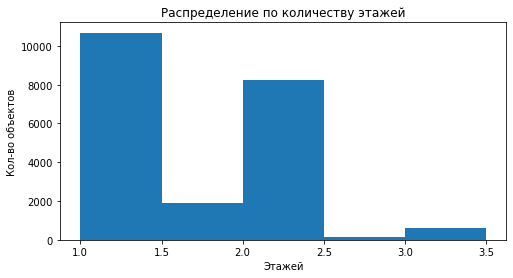

In [137]:
plt.figure(figsize=(8, 4))

plt.hist(df['floors'], bins=5)

plt.title('Распределение по количеству этажей')
plt.xlabel('Этажей')
plt.ylabel('Кол-во объектов')

Большинство объектов имеют этажность в 1 или 2 этажа, так же встречаются промежуточные не целые значения (возможно чердаки).

#### 2.2 Изучите распределение состояния домов

In [138]:
df['condition'].describe().round(2)

count    21613.00
mean         3.41
std          0.65
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          5.00
Name: condition, dtype: float64

In [139]:
condition = df["condition"].value_counts()
condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

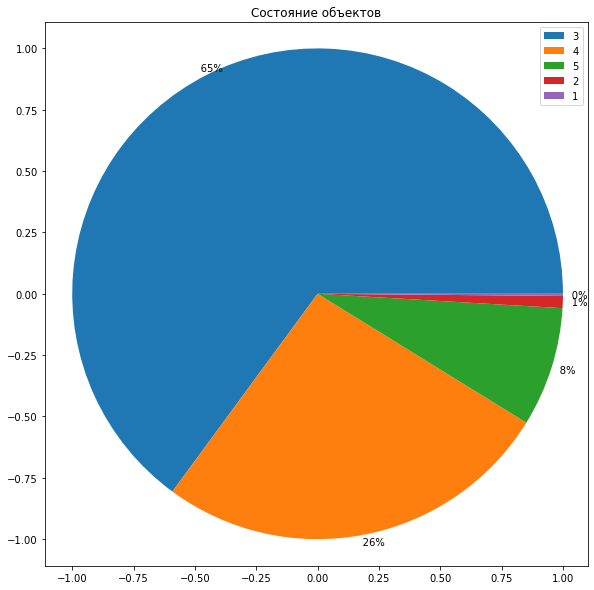

In [140]:
plt.figure(figsize=(10, 10))
plt.pie(condition.values,autopct='%7.lf%%',frame=True,pctdistance = 1.03)
plt.title('Состояние объектов')
plt.legend(condition.index);

Text(0, 0.5, 'Кол-во объектов')

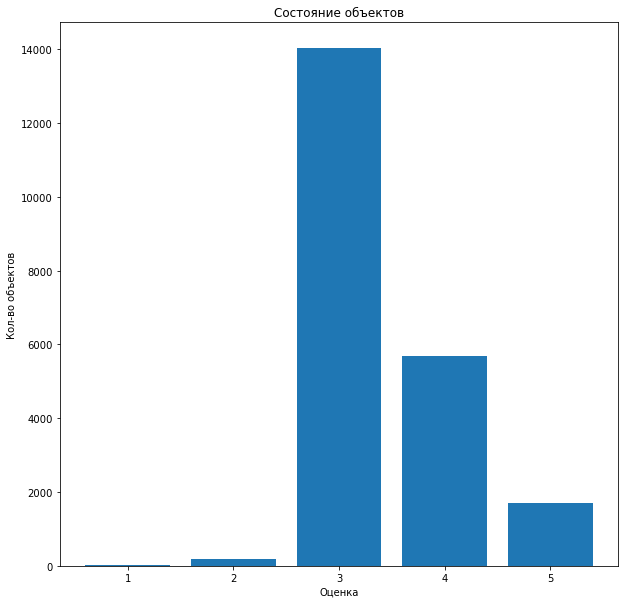

In [141]:
plt.figure(figsize = (10,10))
plt.bar(condition.index, condition.values)
plt.title("Состояние объектов")
plt.xlabel("Оценка")
plt.ylabel("Кол-во объектов")

##### Большинство домов имеют оценку в три балла, реже всего встречается оценка в один и два балла

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

##### Изучим распределение цены объектов:

Text(0, 0.5, 'Кол-во объектов')

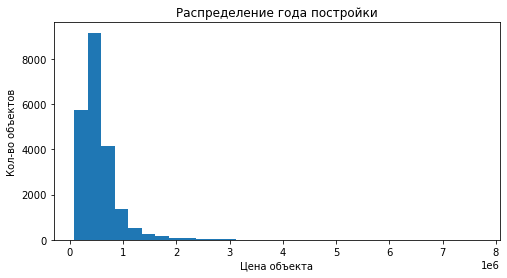

In [142]:
plt.figure(figsize=(8, 4))

plt.hist(df['price'], bins=30)

plt.title('Распределение года постройки')
plt.xlabel('Цена объекта')
plt.ylabel('Кол-во объектов')

In [143]:
df['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

Средняя цена объекта - 540 088, максимальное значение 7 700 000, минимальное 75 000.

##### Изучим зависимость цены объекта от его состояния.

In [144]:
data = df.groupby('condition')['price'].agg(count='mean').reset_index().sort_values(by='condition')
data.head()

,condition,count
0,1,334431.666667
1,2,327287.145349
2,3,542012.578148
3,4,521200.390033
4,5,612418.089359


In [145]:
df['condition'].describe().round(0)

count    21613.0
mean         3.0
std          1.0
min          1.0
25%          3.0
50%          3.0
75%          4.0
max          5.0
Name: condition, dtype: float64

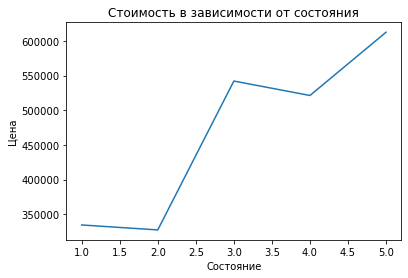

In [146]:
plt.figure(figsize=(6, 4))
plt.plot(data['condition'], data['count'])

plt.title('Стоимость в зависимости от состояния')
plt.xlabel('Состояние')
plt.ylabel('Цена');

##### Цены объектов находятся в прямой зависимости их состояния

In [147]:
##### Рассмотрим зависимость цены объекта от количества спален

In [148]:
import seaborn as sns

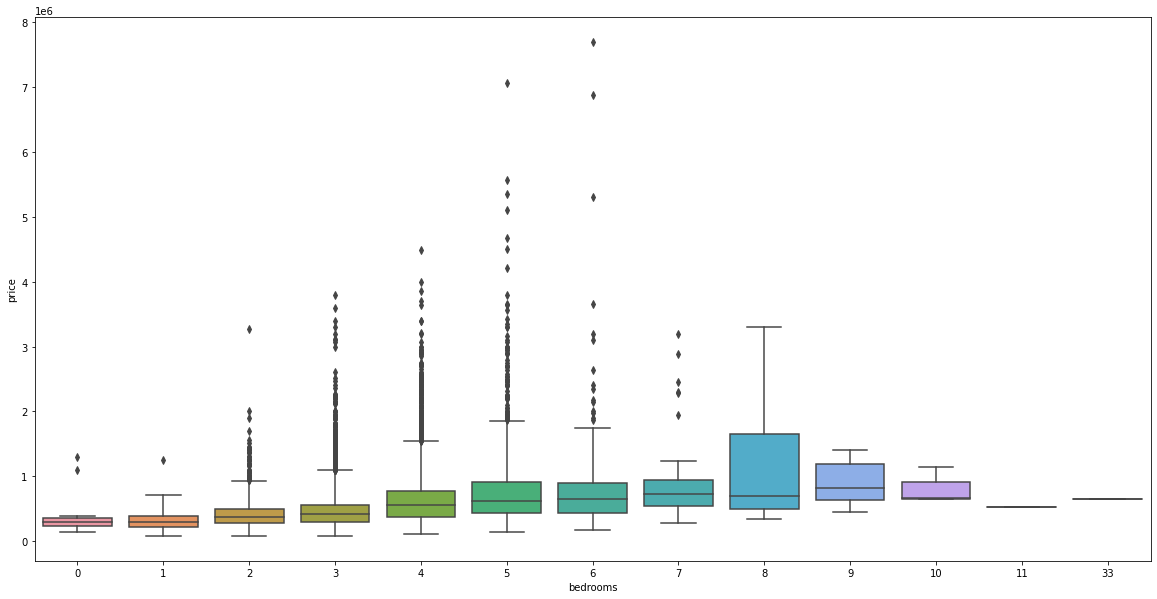

In [149]:
plt.figure(figsize =(20,10))
sns.boxplot(x=df['bedrooms'], y  = df['price'], whis = 2 );

Максимальную стоимость имеют объекты с 5-9 спальнями

##### Изучим зависимость цены объекта от года постройки.

In [150]:
data = df.groupby('yr_built')['price'].agg(count='mean').reset_index().sort_values(by='yr_built')
data.head()

,yr_built,count
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444


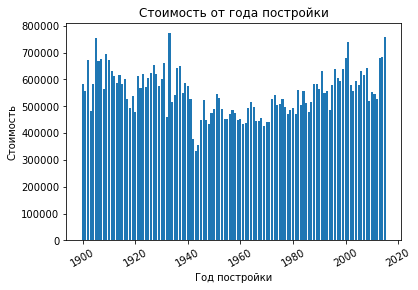

In [151]:
plt.figure(figsize=(6, 4))

plt.bar(data['yr_built'], data['count'])

plt.title('Стоимость от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Стоимость')
plt.xticks(rotation=30);

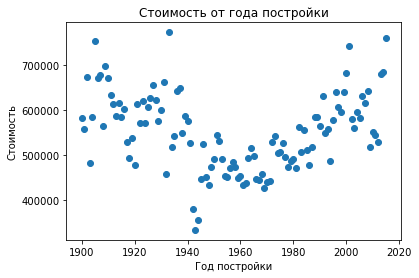

In [152]:
plt.figure(figsize=(6, 4))

plt.scatter(data['yr_built'], data['count'])

plt.title('Стоимость от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Стоимость');

##### Сильной зависимости цены объекта от года постройки не наблюдается (кроме просадки стоимости в районе 1940-1960 годов)

#### Возраст дома с учетом реновации

In [153]:
df['delta_renovated'] = (df['yr_renovated']-df['yr_built']).apply(lambda x: x if x > 0 else 0)+df['yr_built']
data = df.groupby('delta_renovated')['price'].agg(count='mean').reset_index().sort_values(by='delta_renovated')
data.head()

,delta_renovated,count
0,1900,575054.220588
1,1901,545933.642857
2,1902,648488.000000
3,1903,496036.925000
4,1904,586155.102564


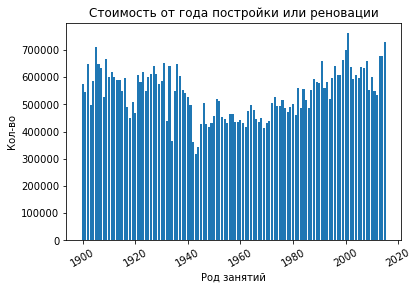

In [154]:
plt.figure(figsize=(6, 4))

plt.bar(data['delta_renovated'], data['count'])

plt.title('Стоимость от года постройки или реновации')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

##### Рассмотрим зависимость не цены всего объекта, а за единицу площади в зависимости от возраста дома с учетом реновации

In [155]:
df['price_m'] = df['price'] / df['sqft_lot']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,price_m
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,1955,39.274336
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1991,74.288870
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,1933,18.000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1965,120.800000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,1987,63.118812


In [156]:
data = df.groupby('delta_renovated')['price_m'].agg(count='mean').reset_index().sort_values(by='delta_renovated')
data.head()

,delta_renovated,count
0,1900,153.716575
1,1901,145.997767
2,1902,155.769074
3,1903,117.399542
4,1904,139.863087


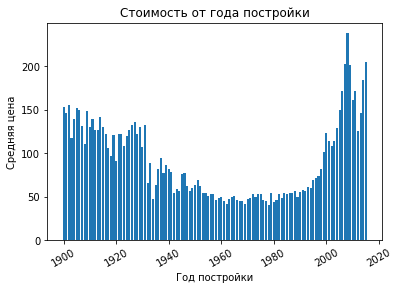

In [157]:
plt.figure(figsize=(6, 4))

plt.bar(data['delta_renovated'], data['count'])

plt.title('Стоимость от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Средняя цена')
plt.xticks(rotation=30);

В переводе на возраст объекта от постройки или реновации

In [158]:
df['age'] =2023- ((df['yr_renovated']-df['yr_built']).apply(lambda x: x if x > 0 else 0)+df['yr_built'])
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,price_m,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,1955,39.274336,68
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1991,74.288870,32
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,1933,18.000000,90
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1965,120.800000,58
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,1987,63.118812,36


In [159]:
data = df.groupby('age')['price_m'].agg(count='mean').reset_index().sort_values(by='age')
data.head()

,age,count
0,8,205.422598
1,9,184.024935
2,10,146.856127
3,11,125.922196
4,12,171.824353


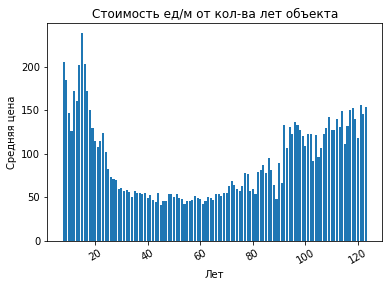

In [160]:
plt.figure(figsize=(6, 4))

plt.bar(data['age'], data['count'])

plt.title('Стоимость ед/м от кол-ва лет объекта')
plt.xlabel('Лет')
plt.ylabel('Средняя цена')
plt.xticks(rotation=30);

##### Зависимость цены в пересчете на метр единицы уже более явная. Более ценны дома недавней постройки или уже имеющие историческую ценность.